In [183]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt



In [201]:
# Load your data into a pandas DataFrame
# data = pd.read_csv('global-data-on-sustainable-energy (1).csv')
data = pd.read_csv('billionares.csv')
# data = pd.read_csv('accidents.csv')

data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,24.2,60.7,67059887.0,46.227638,2.213749,4.0,NaN,NaN,NaN,NaN
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN


In [202]:
data['category']=data['category'].astype('category')
data['industries']=data['industries'].astype('category')

cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data = data.select_dtypes(include=[np.number])

# data = data[['Severity', 'Distance', 'Temperature', 'Humidity', 'Pressure', 'Visibility', 'WindSpeed', 'Precipitation']]
data.drop([ 'latitude_country', 'longitude_country','rank','finalWorth','population_country','gdp_country'], axis=1, inplace=True)
data.head()

,category,age,industries,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,4,74.0,4,1949.0,3.0,5.0,110.05,1.1,65.6,102.5,82.5,24.2,60.7,4.0,NaN,NaN,NaN,NaN
1,0,51.0,0,1971.0,6.0,28.0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN
2,16,59.0,16,1964.0,1.0,12.0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN
3,16,78.0,16,1944.0,8.0,17.0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN
4,5,92.0,5,1930.0,8.0,30.0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN


In [203]:

data = data.fillna(data.median())
# data.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
data.head()


,category,age,industries,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,4,74.0,4,1949.0,3.0,5.0,110.05,1.1,65.6,102.5,82.5,24.2,60.7,4.0,99.0,99.0,98.0,97.0
1,0,51.0,0,1971.0,6.0,28.0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,97.0
2,16,59.0,16,1964.0,1.0,12.0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,97.0
3,16,78.0,16,1944.0,8.0,17.0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,97.0
4,5,92.0,5,1930.0,8.0,30.0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,97.0


[{'name': '1', 'value': 0.46241026396558643}, {'name': '2', 'value': 0.1952097800805896}, {'name': '3', 'value': 0.15881458429259454}, {'name': '4', 'value': 0.0590598788634283}, {'name': '5', 'value': 0.04787083546722092}, {'name': '6', 'value': 0.024660721053103258}, {'name': '7', 'value': 0.017534090990535763}, {'name': '8', 'value': 0.011501897917248408}, {'name': '9', 'value': 0.0069027418744346085}, {'name': '10', 'value': 0.005914516103345962}, {'name': '11', 'value': 0.005283906715367118}, {'name': '12', 'value': 0.002201276058597463}, {'name': '13', 'value': 0.0013061216198419845}, {'name': '14', 'value': 0.0007029664731524999}, {'name': '15', 'value': 0.0003340570208010382}, {'name': '16', 'value': 0.00023133885308675712}, {'name': '17', 'value': 6.1022651065217675e-05}, {'name': '18', 'value': 1.7052435776224022e-31}]


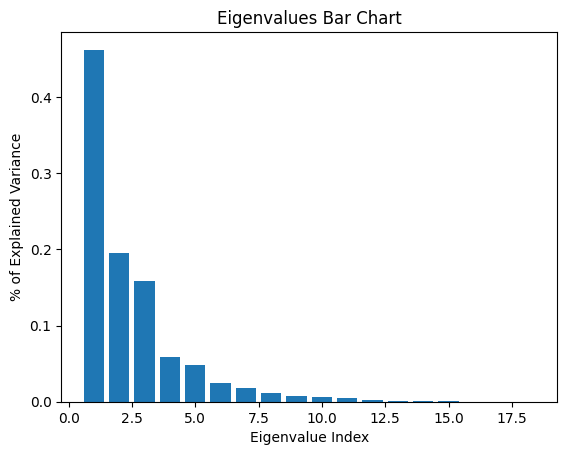

In [210]:

pca = PCA(n_components=len(data.columns))
pca.fit_transform(data)

eigenvalues = pca.explained_variance_ratio_

# print(eigenvalues)
pca_scree_data = [{'name': str(i+1), 'value': eigenvalues[i]} for i in range(len(eigenvalues))]
print(pca_scree_data)
plt.bar(range(1,len(eigenvalues)+1), eigenvalues)
plt.xlabel('Eigenvalue Index')
plt.ylabel('% of Explained Variance')
plt.title('Eigenvalues Bar Chart')
# plt.yscale('log')
plt.show()


In [218]:

def sum_square_loadings(data, di):
    pca = PCA(n_components=di)
    pca.fit_transform(data)

    loadings = pca.components_
    loadings_sum = np.sum(loadings**2, axis=0)
    top_attributes = np.argsort(loadings_sum)[-4:]

    sum_square_loadings = [{'name': data.columns[attribute], 'value': loadings_sum[attribute]} for attribute in top_attributes[::-1]]

    return sum_square_loadings

print(sum_square_loadings(data, 4))


[{'name': 'cpi_country', 'value': 0.9734373354098129}, {'name': 'gross_tertiary_education_enrollment', 'value': 0.9491546333244391}, {'name': 'total_tax_rate_country', 'value': 0.9146490668225984}, {'name': 'age', 'value': 0.49776393194475954}]


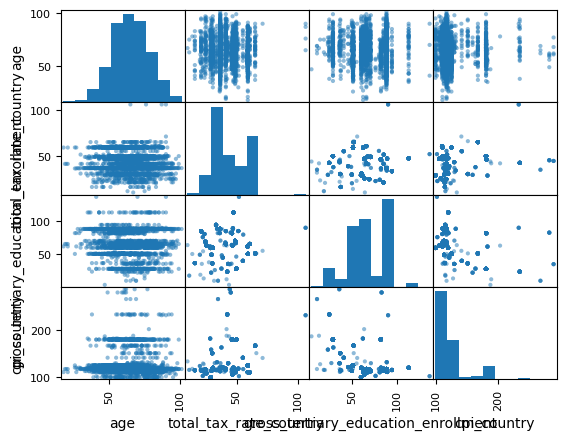

In [207]:

# Construct a scatterplot matrix using the top attributes
scatterplot_data = data.iloc[:, top_attributes]
pd.plotting.scatter_matrix(scatterplot_data)
plt.show()


[{'name': 1, 'value': 4845653.728431435}, {'name': 2, 'value': 3160044.8903641594}, {'name': 3, 'value': 2431542.199690805}, {'name': 4, 'value': 2074681.0516268283}, {'name': 5, 'value': 1850804.3616876488}, {'name': 6, 'value': 1638208.4392672793}, {'name': 7, 'value': 1469420.4562386281}, {'name': 8, 'value': 1468186.7782083116}, {'name': 9, 'value': 1315687.969187062}, {'name': 10, 'value': 1350537.4477076337}]
Optimal k: 3


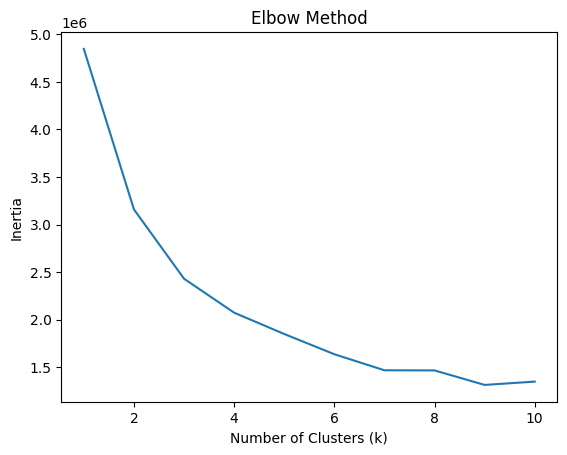

In [220]:
from kneed import KneeLocator

# Use k-means to find clusters
k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


k_means_data = [{'name': k_values[i], 'value': inertia[i]} for i in range(len(k_values))]
print(k_means_data)


knee = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee

print("Optimal k:", optimal_k)

# Visualize the elbow method
plt.plot(k_values, inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


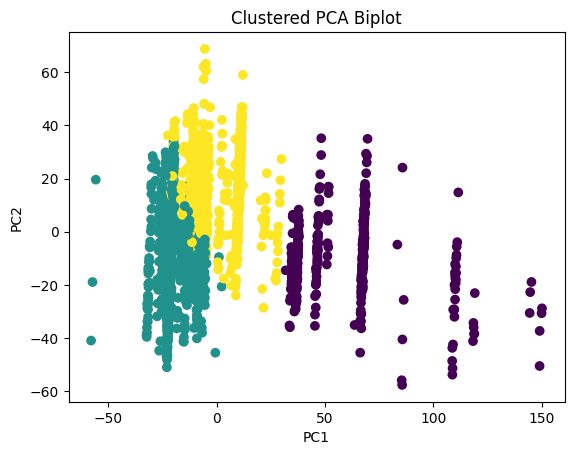

In [209]:
# Perform K-means clustering with the optimal k value
def cluster(data, k, di):
    pca = PCA(n_components=di)
    pca.fit(data)
    transformed_data = pca.transform(data)

    kmeans = KMeans(n_clusters=optimal_k)
    kmeans.fit(transformed_data)

    # Get the cluster labels
    cluster_labels = kmeans.labels_

    # Plot the clustered PCA biplot
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_labels)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Clustered PCA Biplot')
    plt.show()
